Supply Chain Optimization

Case study:
Analyze supply chain data to optimize inventory management, reduce costs,
improve delivery times, and identify potential bottlenecks or inefficiencies.

In [1]:
!pip install pandas numpy matplotlib seaborn plotly


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sample Superstore dataset
superstore_df = pd.read_excel('Sample_Superstore.xlsx')

# Load Deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Preview the first few rows of both datasets
print(superstore_df.head())
print(deliveries_df.head())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847           High      0.01        2.84           0.93            3   
1   20228  Not Specified      0.02      500.98          26.00            5   
2   21776       Critical      0.06        9.48           7.29           11   
3   24844         Medium      0.09       78.69          19.99           14   
4   24846         Medium      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         City  Postal Code O

In [4]:
# Step 3: Data Preprocessing
# 3.1 Check for Missing Values
# We'll first inspect both datasets for any missing values.A

# Check for missing values in both datasets
print(superstore_df.isnull().sum())
print(deliveries_df.isnull().sum())

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64
match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker             

In [6]:
# 3.2 Clean Date Columns
# For the Sample_Superstore.xlsx, convert the Order Date and Ship Date columns to datetime format.

# Convert date columns to datetime format
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'], errors='coerce')
superstore_df['Ship Date'] = pd.to_datetime(superstore_df['Ship Date'], errors='coerce')

# Check the updated date format
print(superstore_df[['Order Date', 'Ship Date']].head())

# For Deliveries.csv, you may need to handle the start_date column similarly:

# Convert start_date to datetime format
deliveries_df['start_date'] = pd.to_datetime(deliveries_df['start_date'], errors='coerce')

# Check the updated date format
print(deliveries_df[['start_date']].head())

  Order Date  Ship Date
0 2015-01-07 2015-01-08
1 2015-06-13 2015-06-15
2 2015-02-15 2015-02-17
3 2015-05-12 2015-05-14
4 2015-05-12 2015-05-13
  start_date
0 2023-03-31
1 2023-03-31
2 2023-03-31
3 2023-03-31
4 2023-03-31


In [7]:
# 3.3 Handle Missing Values or Inconsistencies
# If there are any missing values in critical columns, we can either fill or drop them. For now, we'll simply print the count of missing values to decide the next step.

# Drop or fill missing values (for now, let's print out the counts)
print(superstore_df.isnull().sum())
print(deliveries_df.isnull().sum())

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64
match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker             

In [9]:
# Fill missing values in Product Base Margin with the mean of the column
superstore_df['Product Base Margin'] = superstore_df['Product Base Margin'].fillna(superstore_df['Product Base Margin'].mean())

# Check if the missing values are handled
print(superstore_df['Product Base Margin'].isnull().sum())


0


In [16]:
# List of columns to drop
columns_to_drop = ['wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 
                   'player_dismissed', 'other_wicket_type', 'other_player_dismissed']

# Check if the columns exist in the DataFrame before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in deliveries_df.columns]

# Drop the columns that exist
deliveries_df.drop(columns=existing_columns_to_drop, inplace=True)

# Check the remaining columns
print(deliveries_df.columns)


Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras'],
      dtype='object')


In [23]:
# Fill missing values in start_date with a default date
deliveries_df['start_date'] = deliveries_df['start_date'].fillna(pd.to_datetime('2023-01-01'))

# Check for any remaining missing values in critical columns
print(deliveries_df.isnull().sum())

# Drop rows where critical columns are missing (e.g., venue)
deliveries_df.dropna(subset=['venue'], inplace=True)

# Check again for missing values
print(deliveries_df.isnull().sum())

match_id        0
season          0
start_date      0
venue           0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
bowler          0
runs_off_bat    0
extras          0
dtype: int64
match_id        0
season          0
start_date      0
venue           0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
bowler          0
runs_off_bat    0
extras          0
dtype: int64


In [24]:
# Drop or fill missing values (for now, let's print out the counts)
print(superstore_df.isnull().sum())
print(deliveries_df.isnull().sum())

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64
match_id        0
season          0
start_date      0
venue           0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
bowler          0
runs_off_bat    0
extras          0
dtype: int64


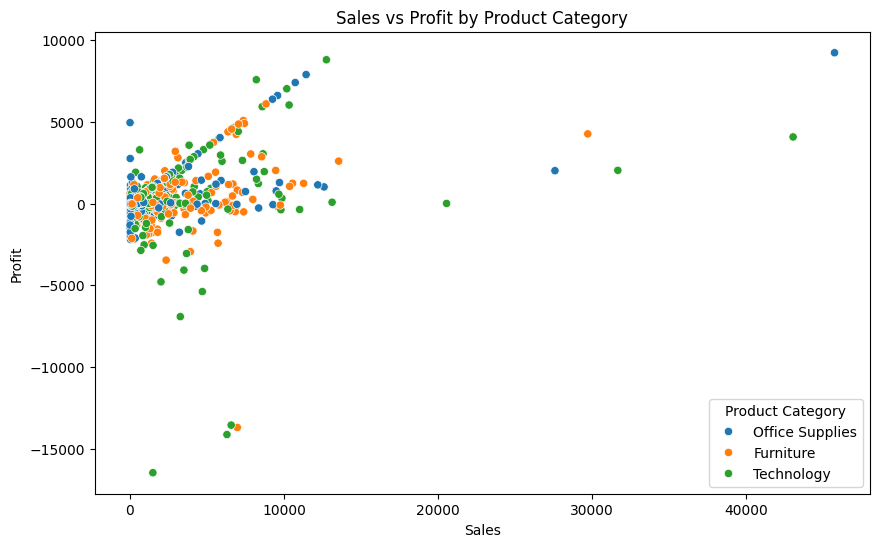

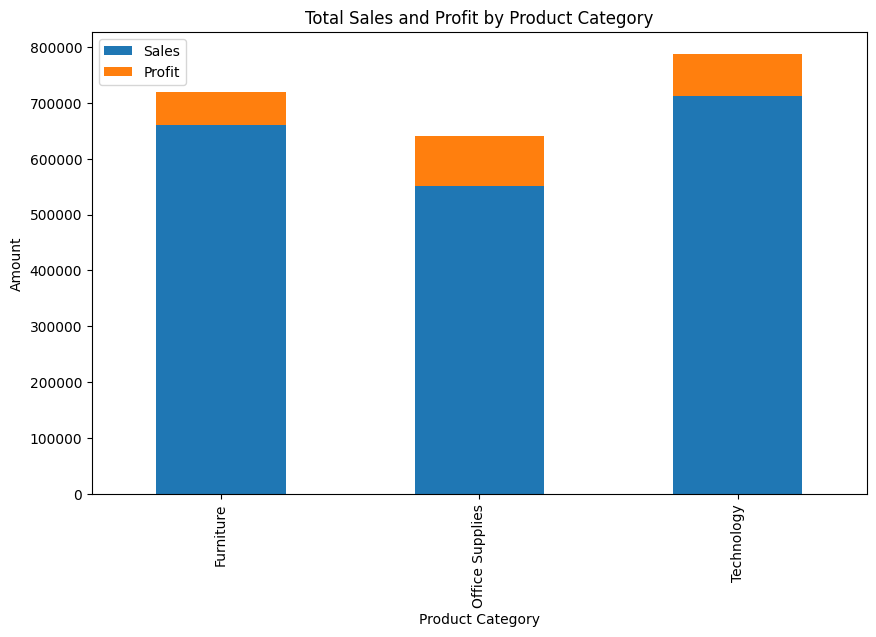

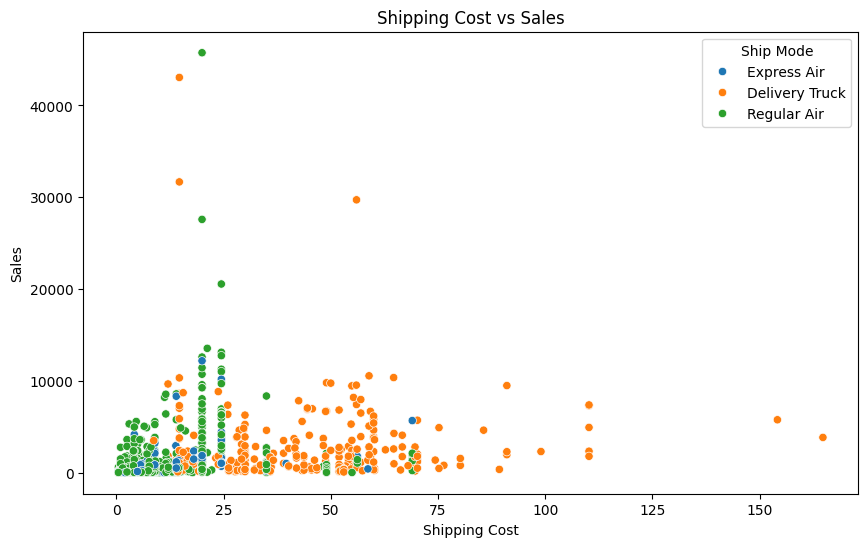

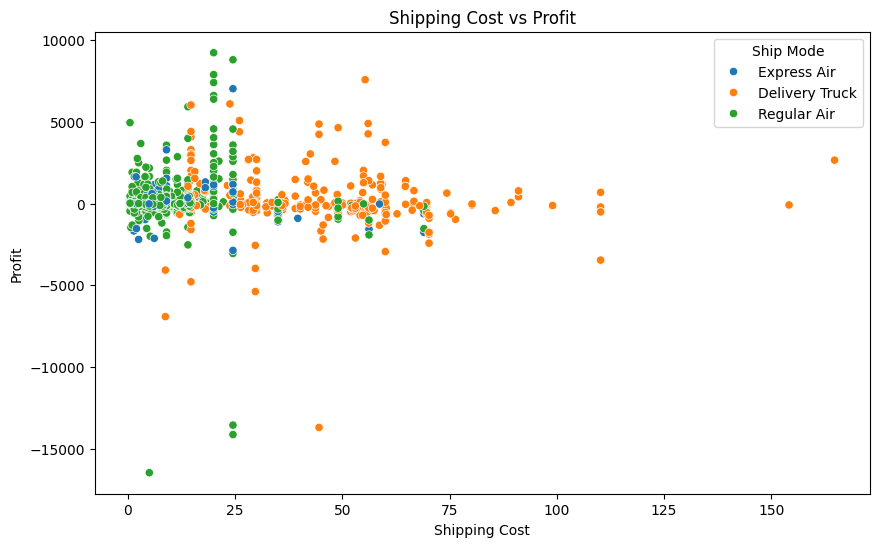

In [51]:
# Step 4: Exploratory Data Analysis (EDA)
# We’ll analyze Sample_Superstore.xlsx and Deliveries.csv individually, focusing on the most relevant supply chain metrics.

# For Sample_Superstore.xlsx (Sales & Inventory Data)
# 4.1 Sales & Profit Analysis
# We’ll visualize the relationship between Sales and Profit.

# Sales vs Profit plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore_df, x='Sales', y='Profit', hue='Product Category')
plt.title('Sales vs Profit by Product Category')
plt.show()

# Group by Product Category and summarize
category_sales_profit = superstore_df.groupby('Product Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plot total sales and profit by product category
category_sales_profit.plot(kind='bar', x='Product Category', y=['Sales', 'Profit'], stacked=True, figsize=(10, 6))
plt.title('Total Sales and Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.show()

# 4.2 Shipping Cost vs Sales/Profit
# We’ll analyze how Shipping Cost impacts Sales and Profit.

# Shipping cost vs sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore_df, x='Shipping Cost', y='Sales', hue='Ship Mode')
plt.title('Shipping Cost vs Sales')
plt.show()

# Shipping cost vs profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore_df, x='Shipping Cost', y='Profit', hue='Ship Mode')
plt.title('Shipping Cost vs Profit')
plt.show()



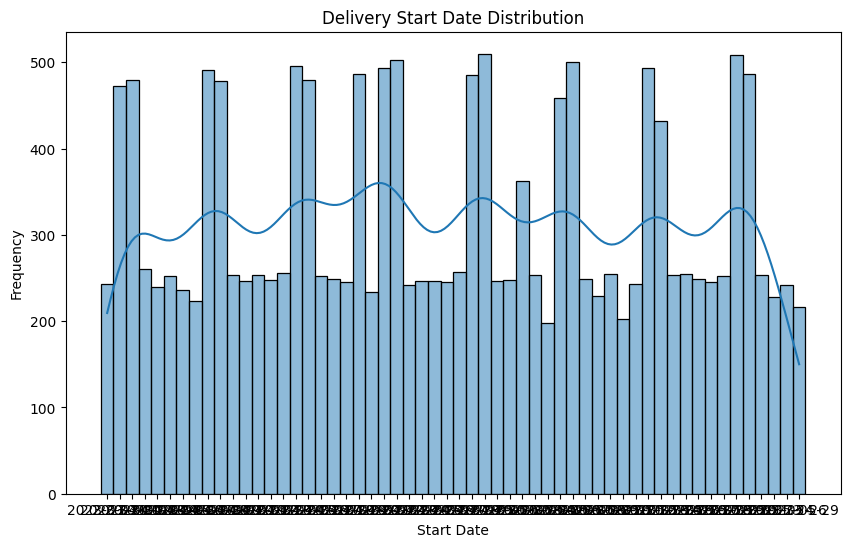

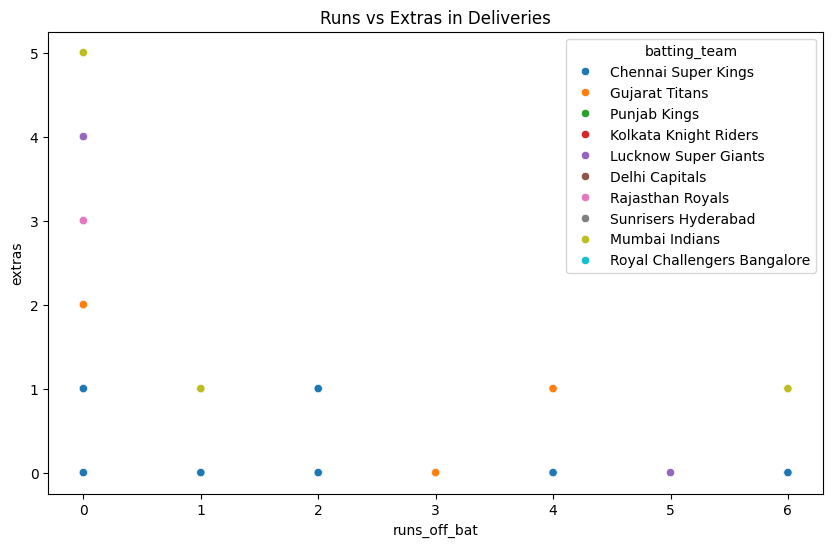

In [53]:
# For Deliveries.csv (Logistics Data)
# 4.3 Delivery Time Analysis
# We’ll calculate and visualize Delivery Time (if applicable). We'll assume start_date from Deliveries.csv represents the time the delivery was initiated.

# Calculate Delivery Time as the difference between ship date and start date
# We need to align start_date and Ship Date from Sample Superstore, but we'll handle deliveries first

# Assuming the delivery time is directly related to the `start_date`
# If we had a 'Ship Date' for deliveries, we could compute delivery time, but here we focus on delivery start.

# Plot the distribution of start dates
plt.figure(figsize=(10, 6))
sns.histplot(deliveries_df['start_date'], kde=True)
plt.title('Delivery Start Date Distribution')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.show()

# 4.4 Delivery Runs Analysis
# Since Deliveries.csv is related to cricket match data, the logistics can be analyzed based on factors such as runs or
# penalties during the match. We can explore this further by checking how runs_off_bat, extras, etc., correlate with each delivery.

# Scatter plot of runs vs extras
plt.figure(figsize=(10, 6))
sns.scatterplot(data=deliveries_df, x='runs_off_bat', y='extras', hue='batting_team')
plt.title('Runs vs Extras in Deliveries')
plt.show()